# Universidad Autónoma de Yucatán

## Facultad de Matemáticas

### Machine Learning

**Teacher:** Dr. Victor Uc Cetina

**Student:** Dayan Bravo Fraga

# Digit Detection

Postal code recognition with convolutional network.

## Download Corpus from GitHub (only for Colab)

In [ ]:
import sys
import os

in_colab: bool = 'google.colab' in sys.modules
if in_colab:
    print('Is running in Colab')
    if not os.path.isdir('machine_learning'):
        print("Downloading project")
        get_ipython().system('git clone https://github.com/dayan3847/machine_learning')
        sys.path.insert(0, './machine_learning/')
    else:
        get_ipython().system('git -C ./machine_learning fetch')
        get_ipython().system('git -C ./machine_learning rebase')
    if not os.path.isdir('digitos'):
        print('Copying Corpus folder')
        get_ipython().system('cp -r ./machine_learning/dayan3847/digit_detection/colab/digitos ./')
else:
    print('Is not running in Colab')

## Import libraries

In [31]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from PIL import Image

## Import Data

In [32]:
(x_train, y_train_), (x_test, y_test_) = keras.datasets.mnist.load_data()

In [34]:
print(x_train.shape)
print(y_train_.shape)
print(x_test.shape)
print(y_test_.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [33]:
y_train = to_categorical(y_train_)
y_test = to_categorical(y_test_)

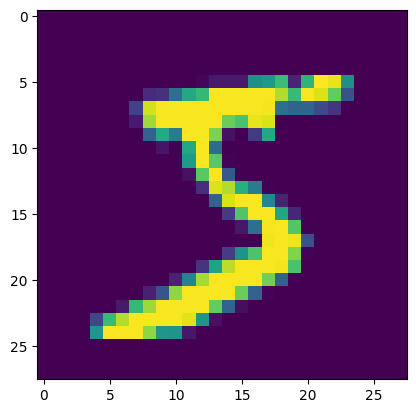

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


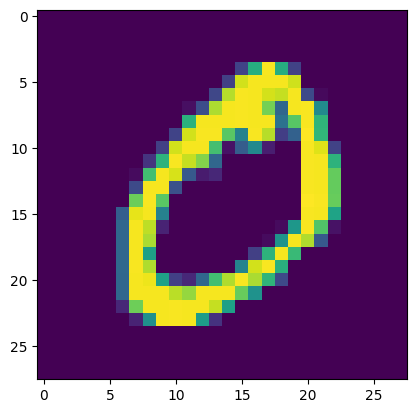

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0


In [35]:
def print_data_sample():
    for i in range(2):
        plt.imshow(x_train[i])
        plt.show()
        print(y_train[i])
        print(y_train_[i])


print_data_sample()

In [36]:
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(10, activation='softmax')(x)

# this is the model we will train
clasificador_cnn = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

In [37]:
clasificador_cnn = keras.models.Sequential([
    keras.layers.Conv2D(20, 9, activation="relu", padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2, padding="same"),
    keras.layers.Conv2D(15, 7, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2, padding="same"),
    keras.layers.Conv2D(10, 5, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2, padding="same"),
    keras.layers.Conv2D(16, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2, padding="same"),
    keras.layers.Conv2D(16, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2, padding="same"),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [38]:
clasificador_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_193 (Conv2D)         (None, 28, 28, 20)        1640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_194 (Conv2D)         (None, 14, 14, 15)        14715     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 7, 7, 15)         0         
 g2D)                                                            
                                                                 
 conv2d_195 (Conv2D)         (None, 7, 7, 10)          3760      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 4, 4, 10)        

In [39]:
clasificador_cnn.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [40]:
h = clasificador_cnn.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 22s 14ms/step - loss: 0.3868 - accuracy: 0.8816 - val_loss: 0.1505 - val_accuracy: 0.9581
Epoch 2/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.1191 - accuracy: 0.9683 - val_loss: 0.1096 - val_accuracy: 0.9679
Epoch 3/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0878 - accuracy: 0.9752 - val_loss: 0.1033 - val_accuracy: 0.9708
Epoch 4/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0733 - accuracy: 0.9786 - val_loss: 0.0929 - val_accuracy: 0.9767
Epoch 5/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0628 - accuracy: 0.9825 - val_loss: 0.0730 - val_accuracy: 0.9812
Epoch 6/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0574 - accuracy: 0.9834 - val_loss: 0.0602 - val_accuracy: 0.9836
Epoch 7/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0526 - accuracy: 0.9848 - val_loss: 0.0664 -

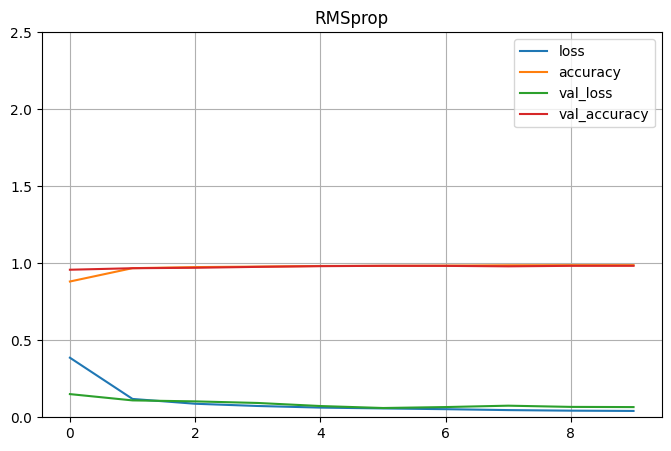

In [41]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.title('RMSprop')
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
plt.show()

In [42]:
predictions = clasificador_cnn.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [43]:
def one_hot_vector(vec):
    max_idx = -1
    max_element = -1
    for i in range(len(vec)):
        if vec[i] > max_element:
            max_idx = i
            max_element = vec[i]
    ohv_ = np.zeros(len(vec))
    ohv_[max_idx] = 1
    return ohv_

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


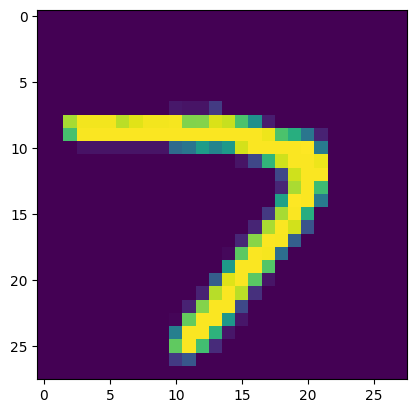

In [88]:
img_input_id = 70
ohv = one_hot_vector(predictions[img_input_id])
print(ohv)
print(y_test[img_input_id])
plt.imshow(x_test[img_input_id]);

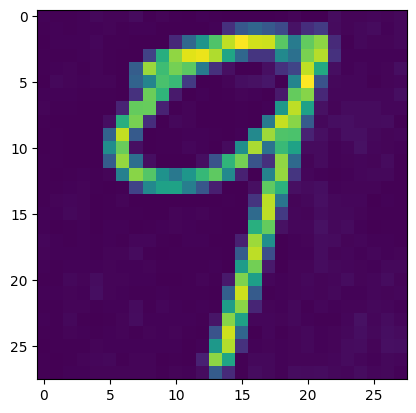

In [51]:
def show_nueve():
    number = 'nueve'
    my_image = Image.open(f'./digitos/191x191/{number}.jpg')
    my_image = my_image.resize((28, 28))
    my_image = np.asarray(my_image)
    my_image = 255 - my_image
    plt.imshow(my_image)
    plt.show()


show_nueve()

In [122]:
numbers_validate = [1, 3, 4, 7, 9]

In [123]:
def my_predict():
    images = [Image.open(f'./digitos/28x28/{str(i)}.jpg') for i in numbers_validate]
    images = np.array([np.asarray(i) for i in images])
    images = np.array([255 - i for i in images])

    return clasificador_cnn.predict(images)


result = my_predict()

1/1 [==============================] - 0s 13ms/step


In [128]:
def normalize_vector(vec: np.array):
    arr_normalized = np.zeros_like(vec)
    arg_max = np.argmax(vec)
    arr_normalized[arg_max] = 1

    return arr_normalized, arg_max

(5, 10)
Number: 1
[0.00168378 0.14906546 0.00885521 0.010979   0.04691962 0.00558277
 0.00501415 0.70925134 0.02132603 0.04132271]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


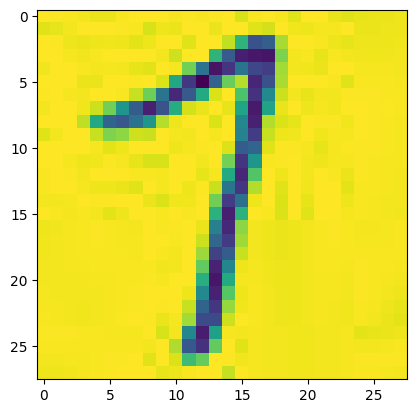

Number: 3
[2.4085672e-05 1.5326640e-09 1.7256178e-03 9.8872912e-01 1.3545424e-07
 4.7050365e-03 4.1738731e-05 4.0889663e-06 4.7103614e-03 5.9767674e-05]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
3


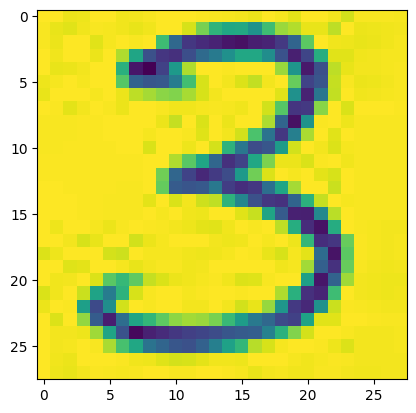

Number: 4
[4.0899180e-05 1.7981606e-02 2.9286917e-03 9.5263764e-04 9.2713600e-01
 5.8495367e-05 3.1927477e-03 2.9992331e-03 3.3281457e-02 1.1428148e-02]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
4


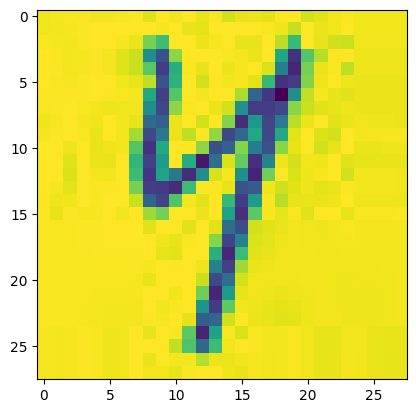

Number: 7
[6.0639643e-08 2.4043733e-02 1.6329945e-05 5.2392575e-06 7.8536535e-04
 9.9871130e-08 4.2882269e-07 9.7485423e-01 2.5350488e-05 2.6914815e-04]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


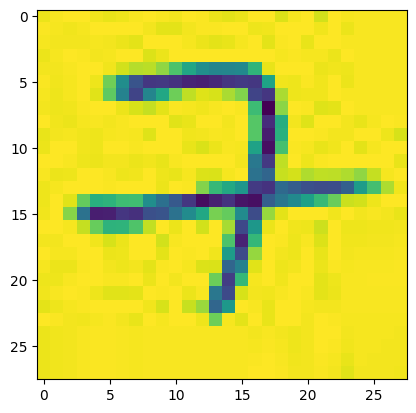

Number: 9
[2.7720080e-04 7.1896531e-02 2.9405856e-03 7.1149860e-03 1.5472496e-01
 1.5856395e-03 2.0292671e-03 6.1419874e-02 3.1101530e-02 6.6690946e-01]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9


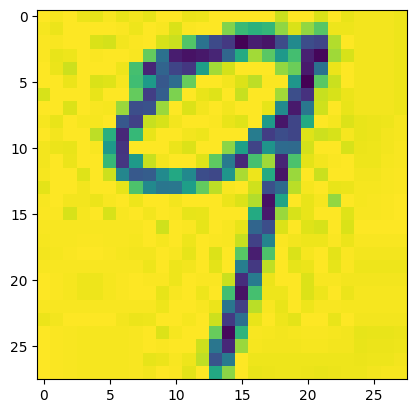

In [129]:
print(result.shape)
for i in range(len(result)):
    print(f'Number: {numbers_validate[i]}')
    print(result[i])
    normalized_vector, value_vector = normalize_vector(result[i])
    print(normalized_vector)
    print(value_vector)
    plt.imshow(Image.open(f'./digitos/28x28/{str(numbers_validate[i])}.jpg'))
    plt.show()

# r = result[0]
# print('r:', r)
# max_value = max(r)
# for i in range(len(r)):
#     if max_value == r[i]:
#         print(i)
#         break